In [4]:
import numpy as np
from matplotlib import pyplot as plt

def read_data_heger_2010():
    
    # Load the data from a file
    filename = 'heger_woosley_CC_2010_apj300379t8_mrt.txt'

    data = np.loadtxt(filename,skiprows=17,usecols=[0,1,3,5])
    data_cut = np.loadtxt(filename,skiprows=17,usecols=[2],dtype=str)
    data_isotope = np.loadtxt(filename,skiprows=17,usecols=[4],dtype=str)

    #print(data.size)
    #print(data.shape)
    #print(data_cut.shape)

    # mass, energy, mixing, yield

    heger_mass = data[:,0]
    heger_energy = data[:,1]
    heger_mixing = data[:,2]
    heger_yield = data[:,3]

    heger_cut = data_cut
    heger_isotope = data_isotope

    heger_masses = np.unique(heger_mass)
    heger_energies = np.unique(heger_energy)
    heger_mixings = np.unique(heger_mixing)
    heger_cuts = np.unique(heger_cut)
    
    heger_isotopes_unique, isotopes_indicies = np.unique(heger_isotope,return_index=True)
    heger_isotopes = heger_isotope[np.sort(isotopes_indicies)]

    #print(heger_masses.size, heger_energies.size, heger_mixings.size, heger_cuts.size)

    #print(heger_isotopes)

    # So we have up to 283 isotopes per model, , but don't have every isotope for every model.
    # And 120 masses for each set of models with the S4 cut.
    # There are then 10 different energies and 4 different mixings, for 40 different sets of models.
    # In Morsony et al. 2015, we used all 10 different energies, but only the 0 mixing set.
    
    
    # So let's make a big array to hold all the sets of models:
    
    heger_2010_all_yields = np.zeros([heger_isotopes.size, heger_masses.size, heger_energies.size, heger_mixings.size])
    
    #print(heger_2010_all_yields.shape)
    #print(heger_2010_all_yields.size)
    
    for i in np.arange(heger_yield.size):
    #for i in np.arange(10):
        if heger_cut[i]=='S4':
            i0 = np.argwhere(heger_isotopes == heger_isotope[i])
            i1 = np.argwhere(heger_masses == heger_mass[i])
            i2 = np.argwhere(heger_energies == heger_energy[i])
            i3 = np.argwhere(heger_mixings == heger_mixing[i])
            
            heger_2010_all_yields[i0,i1,i2,i3] = heger_yield[i]
    
    #print(heger_2010_all_yields.shape)

    # This only returns the data for the S4 cut.
    
    return heger_2010_all_yields,heger_isotopes,heger_masses,heger_energies,heger_mixings
    


In [5]:

# Run the prodecure above to load the Heger & Woosley 2010 core-collapse data:

heger_2010_all_yields, heger_2010_isotope_names, heger_2010_masses, heger_2010_energy, heger_2010_mixing = read_data_heger_2010()

print('This is all using only the S4 cutoff:')
print('Heger & Woosley 2010 Energies = ',heger_2010_energy)
print('Heger & Woosley 2010 Mixing = ',heger_2010_mixing)
print('Heger & Woosley 2010 Masses = ')
print(heger_2010_masses)
print('Heger & Woosley 2010 Isotopes Names = ')
print(heger_2010_isotope_names)

print('Heger & Woosley 2010 all yields shape = ',heger_2010_all_yields.shape)



# This is an example of picking out one particule set of models:
# This one is at energy of 0.9e51 erg and mixing of 0:

heger_2010_e9_m0 = heger_2010_all_yields[:,:,2,0]

print(' ')
print('Shape of model set with energy  = 0.9, mixing = 0:',heger_2010_e9_m0.shape)





This is all using only the S4 cutoff:
Heger & Woosley 2010 Energies =  [ 0.3  0.6  0.9  1.2  1.5  1.8  2.4  3.   5.  10. ]
Heger & Woosley 2010 Mixing =  [0.      0.001   0.00158 0.00251]
Heger & Woosley 2010 Masses = 
[ 10.   10.2  10.4  10.5  10.6  10.7  10.8  10.9  11.   11.1  11.2  11.3
  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.2  12.4  12.6  12.8  13.
  13.2  13.4  13.6  13.8  14.   14.2  14.4  14.6  14.8  15.   15.2  15.4
  15.6  15.8  16.   16.2  16.4  16.6  16.8  17.   17.1  17.2  17.3  17.4
  17.5  17.6  17.7  17.8  17.9  18.   18.1  18.2  18.3  18.4  18.5  18.6
  18.7  18.8  18.9  19.   19.2  19.4  19.6  19.8  20.   20.5  21.   21.5
  22.   22.5  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5
  28.   28.5  29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5
  34.   34.5  35.   36.   37.   38.   39.   40.   41.   42.   43.   44.
  45.   50.   55.   60.   65.   70.   75.   80.   85.   90.   95.  100. ]
Heger & Woosley 2010 Isotopes Names = 
['H1' 'H2' 'H

Fe56


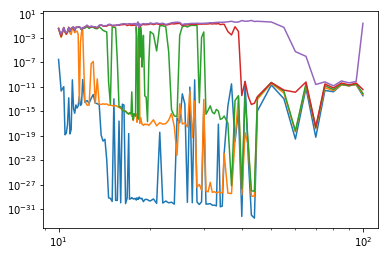

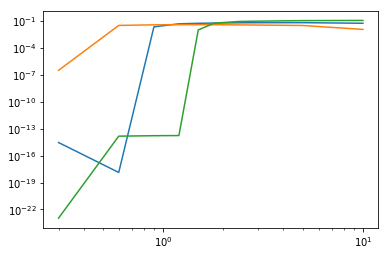

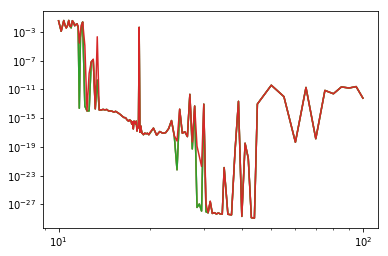

In [7]:

# O16 = 14
# Fe56 = 61

iso = 61
print(heger_2010_isotope_names[iso])

# Plot yield vs. mass for 1 isotope, for different energies
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,0,0])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,2,0])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,4,0])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,6,0])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,8,0])
plt.yscale('log')
plt.xscale('log')
plt.show()

# Plot yields vs. energy for 1 isotope and 1 mass, for a few masses
plt.plot(heger_2010_energy,heger_2010_all_yields[iso,10,:,0])
plt.plot(heger_2010_energy,heger_2010_all_yields[iso,0,:,0])
plt.plot(heger_2010_energy,heger_2010_all_yields[iso,30,:,0])
plt.yscale('log')
plt.xscale('log')
plt.show()

# Plot yield vs. mass for 1 isotope, for different mixings
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,2,0])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,2,1])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,2,2])
plt.plot(heger_2010_masses,heger_2010_all_yields[iso,:,2,3])
plt.yscale('log')
plt.xscale('log')
plt.show()